
## Aprendizaje automático en Python (I) - Rafael Caballero

## Una primera red neuronal


### Índice

[Carga y preparación de datos](#carga)<br>
[Arquitectura de la red](#arquitectura)<br>
[Compilación](#compilacion)<br>
[Entrenamiento](#entrenamiento)<br>
[Evaluación](#evaluacion)<br>
[Predicciónes](#predicciones)<br>
[¿Cómo funciona el modelo?](#como)<br>

<a name="carga"></a>
#### Carga y preparación de datos

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


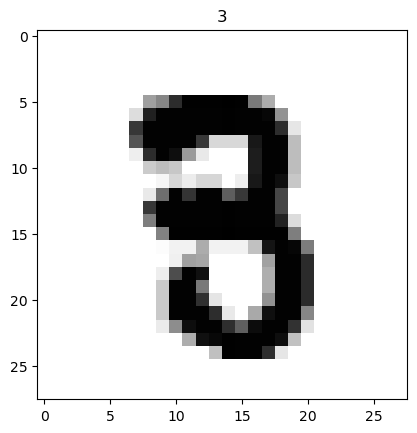

In [12]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

a,_,_ = train_images.shape
p  = random.randint(0,a)
plt.imshow(train_images[p],cmap=plt.cm.binary)
plt.title(train_labels[p])
plt.show()

Escalamos convirtiendo todos los pixels a valores entre 0 y 1. Aplanamos los dígitos que quedan como un solo vector de pixels (todas las filas consecutivas)

In [17]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

<a name="arquitectura"></a>
#### Arquitectura de la red

In [19]:
from keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<a name="compilacion"></a>
#### Compilación

In [21]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

<a name="entrenamiento"></a>
#### Entrenamiento

In [23]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1598 - loss: 2.2802
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5440 - loss: 1.8637
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7291 - loss: 1.1414
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8024 - loss: 0.7926
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8385 - loss: 0.6251


<a name="evaluacion"></a>
#### Evaluación

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8323 - loss: 0.5926
test_acc: 0.8565000295639038


<a name="predicciones"></a>
#### Predicciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


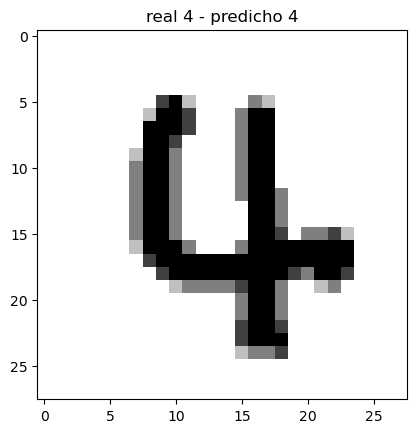

array([5.40846214e-03, 6.08094670e-05, 7.51195401e-02, 2.23381049e-03,
       6.40245676e-01, 9.85233672e-03, 9.85452384e-02, 1.66799091e-02,
       1.17315585e-02, 1.40122801e-01], dtype=float32)

In [29]:
a,_ = test_images.shape
p  = random.randint(0,a)
plt.imshow(test_images[p].reshape(28,28),cmap=plt.cm.binary)

predictions = model.predict(test_images[p:p+1])
v = predictions[0].argmax()
plt.title(f"real {test_labels[p]} - predicho {v}")
plt.show()
predictions[0]

<a name="como"></a>
#### ¿Cómo funciona el modelo?

In [ ]:
Ws = model.get_weights()

In [ ]:
Ws[0].ndim, Ws[1].ndim, Ws[2].ndim, Ws[3].ndim

In [ ]:
import numpy as np

D = test_images[p]
D.shape

In [ ]:
Ws[0].shape, Ws[1].shape, Ws[2].shape, Ws[3].shape

In [ ]:
W1 = Ws[0]
b1 = Ws[1]
W2 = Ws[2]
b2 = Ws[3]

In [ ]:
from tensorflow.nn import softmax, relu

softmax(relu(D.dot(W1) + b1).numpy().dot(W2)+b2).numpy()

Relu es muy fácil de entender, simplemente reemplaza números negativos por 0; la idea es que la neurona no se activa si no alcanza un cierto nivel (generalmente el 0)

In [ ]:
(D.dot(W1) + b1)[:20]

In [ ]:
relu(D.dot(W1) + b1).numpy()[:20]

Explicación:

En la primera capa cada neurona tiene 784 pesos + 1 (la b). Llamamos W1i a los pesos de la neurona i (desde 1 a 512) y b1i al término independiente.

Los 784 valores de la imagen se multiplican escalarmente por los 784 pesos W1i (kernel) de cada neurona (512 neuronas) y se suma la b1i  (bias) de cada neurona. Esto asocia un valor numérico a cada neurona.

La función relu convierte a 0 como salida los valores negativos.

En la segunda capa cada una de las 10 neuronas tiene 512 pesos a los que llamamos W2j con j=1..512 (los kernel), y su término independiente b2j (bias)

Análogamente al caso de la primera los 512 valores de salida de cada capa se multiplican escalarmente por los 512 pesos W2j de cada neurona y se suma el b2j, esto da un número por cada neurona

La función softmax toma estos números y los convierte en probabilidades



<img src=https://www.tutorialspoint.com/deep_learning_with_keras/images/input_layer.jpg width=400 />

In [ ]:
relu(D.dot(W1) + b1).numpy().dot(W2)+b2

In [ ]:
softmax(relu(D.dot(W1) + b1).numpy().dot(W2)+b2).numpy()

In [ ]:
softmax(relu(D.dot(W1) + b1).numpy().dot(W2)+b2).numpy().sum()